# Влияние типов устройств на конверсию воронки

- [Загрузка данныx кликстрима из файла [`click_stream2.csv`](data/click_stream2.csv "click stream 2")](#Детализация-воронки-до-типа-устройства)
- [Конверсия перехода для Mobile-устройств](#Конверсия-перехода-для-Мобильных-устройств-(Mobile))
- [Конверсия перехода для Desktop устройств](#Конверсия-перехода-для-Десктопных-устройств-(Desktop))
- [Выводы: происходит ли ухудшение воронки, обнаруженное в 3 уроке, только на одном устройстве, или на всех](#Выводы)

## Детализация воронки до типа устройства

Для начала загрузим данные кликстрима и посчитаем количество переходов в разрезе *типов устройств*. А затем попытаемся оценить как влияет *тип устройства* на падение конверсии воронки между февралём и мартом 2015 года (в тех месяцах, где наблюдаются проблемы, как мы выяснили ранее).

In [1]:
import csv
from copy import deepcopy as dcopy

funnel_by_device = {} # создаём словарь девайсов, где будут храниться словари словарей
funnel_by_month = {} # создаем словарь, где будут храниться словари за каждый месяц
funnel_template = {'1_home_page':0, '2_search_page':0, '3_payment_page':0, '4_payment_confirmation_page':0}
funnel_template1 = {'2015-01': funnel_template.copy(),
                    '2015-02': funnel_template.copy(),
                    '2015-03': funnel_template.copy(),
                    '2015-04': funnel_template.copy()}

with open('data/click_stream2.csv', mode='r') as csv_file: # открываем файл
    csv_reader = csv.DictReader(csv_file, fieldnames=['ID','page','date','device']) # читаем файл
    
    # проходим циклом по объекту csv_reader
    for row in csv_reader: # берем строку из объекта csv_reader

        page = list(row.values())[1] # вытаскиваем название страницы
        event_date = list(row.values())[2][:-3] # вытаскиваем дату в формате YYYY-MM
        device = list(row.values())[3] # устройство

        if device not in funnel_by_device:
            funnel_by_device[device] = dcopy(funnel_template1)
            
            # проверяем условиями и прибавляем единицу к нужному ключу в словаре        
        if page == '1_home_page':
            funnel_by_device[device][event_date][page] += 1
        elif page == '2_search_page':
            funnel_by_device[device][event_date][page] += 1
        elif page == '3_payment_page':
            funnel_by_device[device][event_date][page] += 1
        else:
            funnel_by_device[device][event_date][page] += 1
               
funnel_by_device

{'Desktop': {'2015-01': {'1_home_page': 15050,
   '2_search_page': 7529,
   '3_payment_page': 1221,
   '4_payment_confirmation_page': 60},
  '2015-02': {'1_home_page': 15050,
   '2_search_page': 7632,
   '3_payment_page': 1191,
   '4_payment_confirmation_page': 54},
  '2015-03': {'1_home_page': 15050,
   '2_search_page': 7370,
   '3_payment_page': 296,
   '4_payment_confirmation_page': 14},
  '2015-04': {'1_home_page': 15050,
   '2_search_page': 7569,
   '3_payment_page': 302,
   '4_payment_confirmation_page': 22}},
 'Mobile': {'2015-01': {'1_home_page': 7550,
   '2_search_page': 6025,
   '3_payment_page': 1169,
   '4_payment_confirmation_page': 129},
  '2015-02': {'1_home_page': 7550,
   '2_search_page': 6055,
   '3_payment_page': 1221,
   '4_payment_confirmation_page': 119},
  '2015-03': {'1_home_page': 7550,
   '2_search_page': 1509,
   '3_payment_page': 335,
   '4_payment_confirmation_page': 30},
  '2015-04': {'1_home_page': 7550,
   '2_search_page': 1511,
   '3_payment_page': 295,

## Конверсия перехода для **Мобильных устройств** (Mobile)

In [2]:
import pandas as pd, numpy as np

df_mobile = pd.DataFrame(funnel_by_device['Mobile'])
df_mobile.style.set_table_styles(
    [{'selector': 'tr:nth-of-type(1) td',
      'props': [('background-color', 'lightgreen')]},
     {'selector': 'tr:nth-of-type(2)',
      'props': [('background-color', 'lightpink')]}
    ]
                                )\
    .format('(!!!) {}', subset=pd.IndexSlice['2_search_page', '2015-03'])

,2015-01,2015-02,2015-03,2015-04
1_home_page,7550,7550,7550,7550
2_search_page,6025,6055,(!!!) 1509,1511
3_payment_page,1169,1221,335,295
4_payment_confirmation_page,129,119,30,24


Здесь мы видим, что количество посещений *главной страницы* идентично во всех месяцах (7550 посещений), но на *странице поиска* происходит ***резкое падение*** с 6000 до 1500 (!!!)

Визуализируем изменение количества посетителей для *страницы поиска*

In [3]:
df_diag_m = df_mobile.iloc[1:2, :].T
df_diag_m['month'] = df_diag_m.index
df_diag_m

,2_search_page,month
2015-01,6025,2015-01
2015-02,6055,2015-02
2015-03,1509,2015-03
2015-04,1511,2015-04


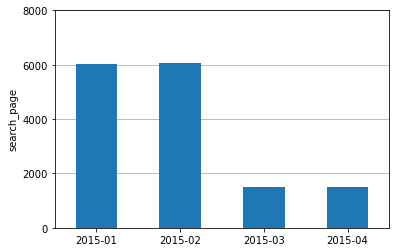

In [4]:
bar = df_diag_m.plot.bar(x='month', y='2_search_page', yticks=np.arange(0,8001,2000), rot=0, legend=None, xlabel='', ylabel='search_page')
bar.grid(axis='y')
bar.set_axisbelow(True)

Здесь явно видно **падение в 4 раза** количества людей, которые пришли с *главной страницы* на *страницу поиска* т.е. в <u>***мобильных приложениях что-то не так с поиском***</u>

## Конверсия перехода для **Десктопных устройств** (Desktop)

Посмотрим теперь что происходит на **дестопных устройствах** (на стационарных компьютерах)

In [5]:
df_desktop = pd.DataFrame(funnel_by_device['Desktop'])
df_desktop.style.set_table_styles(
    [{'selector': 'tr:nth-of-type(-n+2) td',
      'props': [('background-color', 'lightgreen')]},
     {'selector': 'tr:nth-of-type(3)',
      'props': [('background-color', 'lightpink')]}
    ]
                                )\
    .format('(!!!) {}', subset=pd.IndexSlice['3_payment_page', '2015-03'])

,2015-01,2015-02,2015-03,2015-04
1_home_page,15050,15050,15050,15050
2_search_page,7529,7632,7370,7569
3_payment_page,1221,1191,(!!!) 296,302
4_payment_confirmation_page,60,54,14,22


Визуализируем изменение количества посетителей для *страницы оплаты*

In [6]:
df_diag_d = df_desktop.iloc[2:3, :].T
df_diag_d['month'] = df_diag_d.index
df_diag_d

,3_payment_page,month
2015-01,1221,2015-01
2015-02,1191,2015-02
2015-03,296,2015-03
2015-04,302,2015-04


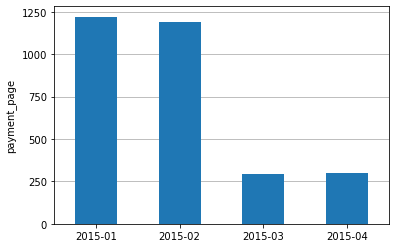

In [7]:
bar = df_diag_d.plot.bar(x='month', y='3_payment_page', yticks=np.arange(0,1251,250), rot=0, legend=None, xlabel='', ylabel='payment_page')
bar.grid(axis='y')
bar.set_axisbelow(True)

## Выводы

Видно, что на ***десктопных устройствах*** ситуация другая: на главной странице также всё идентично, как и с ***мобильными устройствами*** (но при этом количество переходов в 2 раза больше, чем с мобильных устройств). Также видно, что количество людей, которые потом перешли на *страницу поиска*, также <u>не меняется по месяцам</u> по сравнению с мобильными устройствами. Но на странице *начала оплаты* присходит **резкое падение**! В те же **4 раза** - с 1200 до 300 человек.
___

## Итоги

Что удалось понять по итогам детализации воронки до типа устройств. Во-первых, проблма присутствует **на обоих устройствах** сразу. На обоих устройствах наш сайт был сломан между февралём и матром 2015 года. Во-вторых, неожиданно, сайт был сломан **в разных местах**: если на *мобильном приложении* был сломан <u>*поиск*</u>, то на *десктопе* <u>была сломана *страница оплаты*</u>, в то время как поиск не пострадал. И эта информация <u>должна помочь разработчикам</u> найти тот код, который они выкатили между февралём и мартом 2015 года.

___
Продолжение в [финальном ноутбуке](funnels_final.ipynb "funnels final")